---------------------------
### MAAD-Face: A Massively Annotated Attribute Dataset for Face Images
### Source: https://github.com/pterhoer/MAAD-Face

In [16]:
# Load the EasyDict
import pandas as pd
import pickle
import numpy as np
from PIL import Image
from IPython.display import display
import numpy as np
import math
import os
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split


In [2]:
with open("MAAD_Face_1.0.pkl", "rb") as f:
    maad = pickle.load(f)

# Check the top-level keys
print(type(maad))
print(maad.keys())

df = pd.read_csv('MAAD_Face.csv')
df.head()

<class 'pandas.core.frame.DataFrame'>
Index(['Filename', 'Identity', 'Male', 'Young', 'Middle_Aged', 'Senior',
       'Asian', 'White', 'Black', 'Rosy_Cheeks', 'Shiny_Skin', 'Bald',
       'Wavy_Hair', 'Receding_Hairline', 'Bangs', 'Sideburns', 'Black_Hair',
       'Blond_Hair', 'Brown_Hair', 'Gray_Hair', 'No_Beard', 'Mustache',
       '5_o_Clock_Shadow', 'Goatee', 'Oval_Face', 'Square_Face', 'Round_Face',
       'Double_Chin', 'High_Cheekbones', 'Chubby', 'Obstructed_Forehead',
       'Fully_Visible_Forehead', 'Brown_Eyes', 'Bags_Under_Eyes',
       'Bushy_Eyebrows', 'Arched_Eyebrows', 'Mouth_Closed', 'Smiling',
       'Big_Lips', 'Big_Nose', 'Pointy_Nose', 'Heavy_Makeup', 'Wearing_Hat',
       'Wearing_Earrings', 'Wearing_Necktie', 'Wearing_Lipstick', 'No_Eyewear',
       'Eyeglasses', 'Attractive'],
      dtype='object')


/var/folders/s9/vpff5dcd39jfgbrc9w57xnrw0000gn/T/ipykernel_12343/825352793.py:8: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('MAAD_Face.csv')


,Filename,Identity,Male,Young,Middle_Aged,Senior,Asian,White,Black,Rosy_Cheeks,...,Big_Nose,Pointy_Nose,Heavy_Makeup,Wearing_Hat,Wearing_Earrings,Wearing_Necktie,Wearing_Lipstick,No_Eyewear,Eyeglasses,Attractive
0,n000002/0001_01.jpg,2,-1,1,-1,-1,-1,1,-1,0,...,-1,1,1,-1,1,-1,1,1,-1,1
1,n000002/0002_01.jpg,2,-1,1,-1,-1,-1,1,-1,0,...,-1,1,1,-1,1,-1,1,1,-1,1
2,n000002/0003_01.jpg,2,-1,1,-1,-1,-1,1,-1,0,...,-1,1,1,-1,1,-1,1,1,-1,1
3,n000002/0004_01.jpg,2,-1,1,-1,-1,-1,1,-1,0,...,-1,1,1,-1,1,-1,1,1,-1,1
4,n000002/0005_01.jpg,2,-1,1,-1,-1,-1,1,-1,0,...,-1,1,1,-1,1,-1,1,1,-1,1


### Creating full Path

In [3]:
def find_image_path(filename, folders=['train', 'val']):
    """
    Checks each folder and returns the first valid path for the given filename.
    """
    for folder in folders:
        full_path = os.path.join(folder, filename)
        if os.path.isfile(full_path):
            return full_path
    return None  

In [4]:
df['full_path'] = df['Filename'].apply(find_image_path)
df['Filename'] = df['Filename'].str.strip().str.lstrip('/')

### File Sanity Check

In [5]:
missing_df = df[df['full_path'].isnull()]
print(missing_df['Filename'].head())

176137    n000503/0001_02.jpg
176138    n000503/0002_01.jpg
176139    n000503/0003_01.jpg
176140    n000503/0004_01.jpg
176141    n000503/0005_01.jpg
Name: Filename, dtype: object


In [6]:
missing_filenames = [
    "n000503/0001_02.jpg",
    "n000503/0002_01.jpg",
    "n000503/0003_01.jpg",
    "n000503/0004_01.jpg",
    "n000503/0005_01.jpg"
]

for filename in missing_filenames:
    print(f"Checking {filename}")
    print("  In train?", os.path.isfile(os.path.join('train', filename)))
    print("  In val?  ", os.path.isfile(os.path.join('val', filename)))

Checking n000503/0001_02.jpg
  In train? False
  In val?   False
Checking n000503/0002_01.jpg
  In train? False
  In val?   False
Checking n000503/0003_01.jpg
  In train? False
  In val?   False
Checking n000503/0004_01.jpg
  In train? False
  In val?   False
Checking n000503/0005_01.jpg
  In train? False
  In val?   False


In [7]:
# Storing Missing Files
missing_df = df[df['full_path'].isnull()]
missing_df['Filename'].to_csv("missing_images.txt", index=False, header=False)

In [8]:
# Good Files
df_good = df[df['full_path'].notnull()]
df_good['split'] = df_good['full_path'].apply(lambda x: 'train' if 'train' in x else ('val' if 'val' in x else 'other'))

num_train = (df_good['split'] == 'train').sum()
num_val = (df_good['split'] == 'val').sum()
total_good = len(df_good)

print(f"Total good files: {total_good}")
print(f"  In train: {num_train}")
print(f"  In val:   {num_val}")

df_good.to_csv('good_images.csv')


/var/folders/s9/vpff5dcd39jfgbrc9w57xnrw0000gn/T/ipykernel_12343/1854469173.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_good['split'] = df_good['full_path'].apply(lambda x: 'train' if 'train' in x else ('val' if 'val' in x else 'other'))


Total good files: 197370
  In train: 176137
  In val:   21233


In [9]:
col = list(df_good.columns)
non_label = ['Identity', 'Split', 'full_path']
non_label = ['Identity', 'Split', 'full_path', 'Filename']
labels = [c for c in col if c not in non_label]

### Feature Distribution

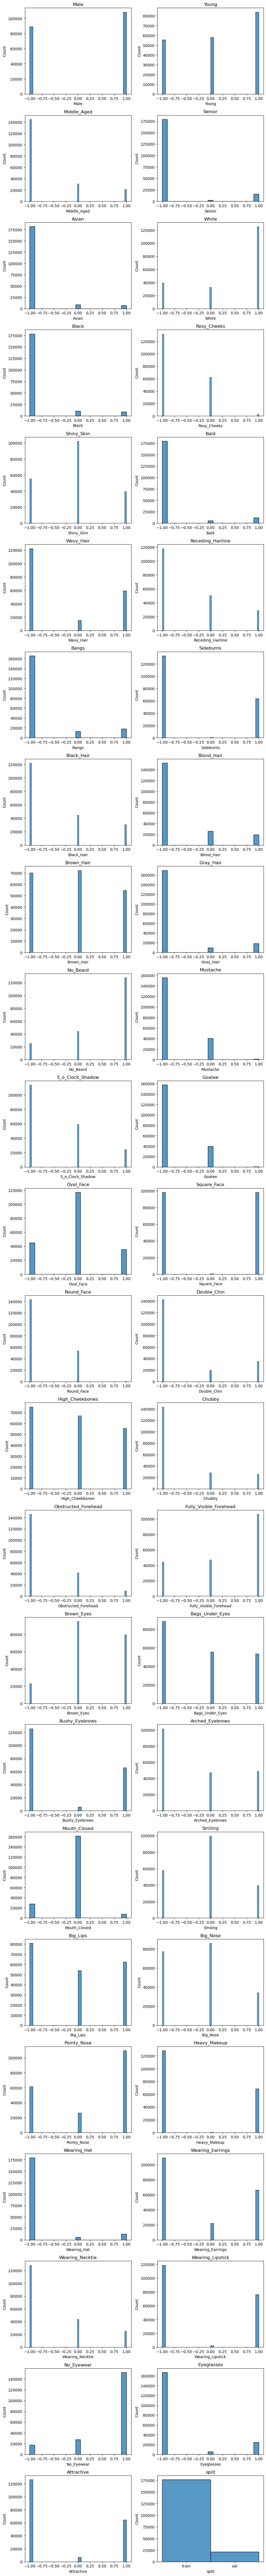

In [ ]:
n = len(labels)
cols = 2
rows = math.ceil(n / cols)

fig, axes = plt.subplots(rows, cols, figsize=(10, rows * 4))

for idx, label in enumerate(labels):
    r = idx // cols
    c = idx % cols
    ax = axes[r, c] if rows > 1 else axes[c]
    sns.histplot(df_good[label], ax=ax)
    ax.set_title(label)

# Hide any empty subplots
for idx in range(n, rows * cols):
    r = idx // cols
    c = idx % cols
    fig.delaxes(axes[r, c] if rows > 1 else axes[c])

plt.tight_layout()
plt.show()


<Axes: >

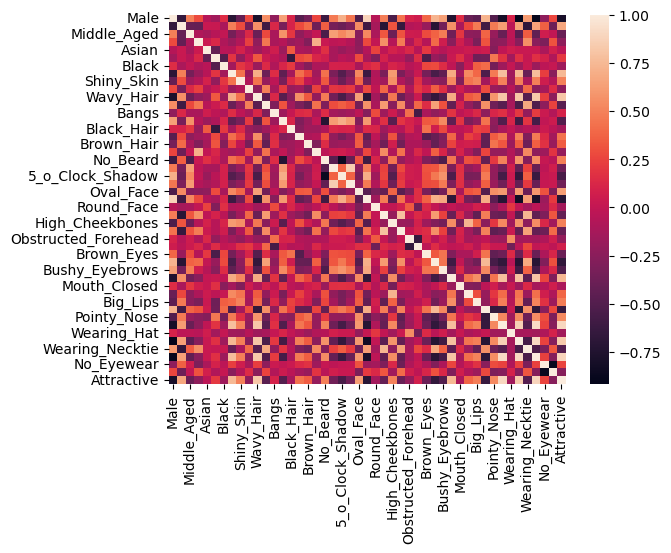

In [11]:
corr_mat = df_good.corr(numeric_only=True)
sns.heatmap(corr_mat)

### Architecture

In [12]:
maad_df = pd.read_csv('good_images.csv')
maad_df.drop(columns=['Filename','Unnamed: 0'], axis= 1, inplace= True)

# Splitting Data
train_df = maad_df[maad_df['split'] == 'train'].reset_index(drop=True)
val_df   = maad_df[maad_df['split'] == 'val'].reset_index(drop=True)

maad_df.drop(columns = 'full_path', axis = 1, inplace = True)
maad_df.drop(columns= 'split', axis= 1, inplace= True)

categorical_cols = maad_df.columns[1:]

train_df.drop(columns='split', axis=1, inplace= True)
val_df.drop(columns='split', axis=1, inplace= True)



In [13]:
def preprocessing(df):
    processed_imgs = []
    processed_idxs = []
    for i, img_path in enumerate(df['full_path'].values):
        if not os.path.isfile(img_path):
            continue
        try:
            img = Image.open(img_path)
            img_resized = img.resize((224, 224))
            arr = np.array(img_resized)
            arr = arr.astype('float32') / 255.0
            processed_imgs.append(arr)
            processed_idxs.append(i)  # Save the index of successful image
        except Exception as e:
            continue
    return np.stack(processed_imgs), processed_idxs

In [17]:
train_df, test_df = train_test_split(train_df[:40000], test_size=0.2, random_state=42, shuffle=True)

X_train, idx_train = preprocessing(train_df)
X_test, idx_test = preprocessing(test_df)

In [19]:
y_train = pd.get_dummies(train_df[categorical_cols], columns=categorical_cols).iloc[idx_train].values.astype(np.float32)
y_test = pd.get_dummies(test_df[categorical_cols], columns=categorical_cols).iloc[idx_test].values.astype(np.float32)

In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, AveragePooling2D
from tensorflow.keras.optimizers import Adam


input_shape = (224, 224, 3)  
num_classes = y_train.shape[1]           

model = Sequential([
    Conv2D(120, kernel_size= (3,3), activation='relu', input_shape=input_shape),
    MaxPooling2D((2,2)),
    
    Conv2D(60, kernel_size= (3,3), activation='relu'),
    MaxPooling2D((2,2)),

    Conv2D(30, kernel_size=(3,3), activation= 'relu'),
    MaxPooling2D((2,2)),
    
    
    Flatten(),
    Dense(120, activation='relu'),
    Dropout(0.5),

    Dense(60, activation= 'relu'),
    Dropout(0.5),

    Dense(30, activation= 'relu'),
    Dropout(0.5),

    
    Dense(num_classes, activation='sigmoid')  
])

optimizer = Adam(learning_rate= .05)  

model.compile(
    optimizer='adam',
    loss='binary_crossentropy', 
    metrics=['accuracy']
)

model.summary()


/opt/anaconda3/envs/ml/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 120)  │         3,360 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 120)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 60)   │        64,860 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 60)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 30)     │        16,230 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 30)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 20280)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 120)            │     2,433,720 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 60)             │         7,260 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 60)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 30)             │         1,830 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 30)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 140)            │         4,340 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,531,600 (9.66 MB)

 Trainable params: 2,531,600 (9.66 MB)

 Non-trainable params: 0 (0.00 B)

In [22]:
history = model.fit(
    X_train,           
    y_train,          
    batch_size=300,
    epochs=10,
    validation_split=0.2,
)

Epoch 1/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 895s 10s/step - accuracy: 0.0154 - loss: 0.6405 - val_accuracy: 0.0000e+00 - val_loss: 0.4903
Epoch 2/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 1290s 15s/step - accuracy: 0.0000e+00 - loss: 0.5003 - val_accuracy: 0.0000e+00 - val_loss: 0.4668
Epoch 3/10
64/86 ━━━━━━━━━━━━━━━━━━━━ 3:25 9s/step - accuracy: 0.0000e+00 - loss: 0.4781

KeyboardInterrupt: 

In [ ]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()
